## Imports

In [1]:
from scipy.io import wavfile
import numpy as np
import os
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random
import pickle
%matplotlib inline 

## Read wav files

### Load from pkl file, or read from directory and store in pkl file

In [2]:
if os.path.isfile('sound.pkl') and os.path.isfile('fs.pkl'):
    with open('sound.pkl', 'rb') as f:
            sound = pickle.load(f)
    with open('fs.pkl', 'rb') as f:
            fs = pickle.load(f)
else:
    sound = []
    fs = []
    i = 0 #just load the first 100 sounds
    for file in os.listdir(r'./wav'):
        if file.endswith(".wav") and i < 100:
            f, data = wavfile.read('./wav/' + file)
            sound.append(data)
            fs.append(f)
            i += 1
#         else:
#             print("Wrong file:" + file)
    with open('sound.pkl', 'wb') as f:
        pickle.dump(sound, f)
    with open('fs.pkl', 'wb') as f:
        pickle.dump(fs, f)

## Visualization of spectrum

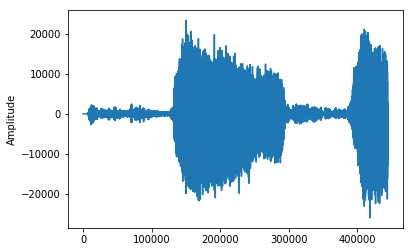

In [3]:
plt.ylabel('Amplitude')
plt.plot(sound[0])
plt.show()

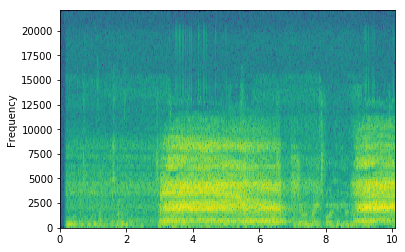

In [4]:
plt.ylabel('Frequency')
plt.specgram(sound[0], Fs = fs[0])
plt.show()

## Standardization

In [5]:
sound = (sound - np.hstack(sound).mean()) / np.hstack(sound).std()

### Mean and Standard deviation

In [6]:
print("Mean: " + str(np.round(np.hstack(sound).mean(), 4)))
print("Standard deviation: " + str(np.round(np.hstack(sound).std(), 4)))

Mean: 0.0
Standard deviation: 1.0


In [7]:
#Shuffle the list
random.Random(0).shuffle(sound)

In [8]:
print("Length of 'sound' list: " + str(len(sound)))

Length of 'sound' list: 100


## Split train, validation and test set

In [9]:
train = sound[:int(len(sound) * 0.8)]
test = sound[int(len(sound) * 0.8) : int(len(sound) * 0.9)]
valid = sound[int(len(sound) * 0.9):]

In [10]:
train

array([array([0.00211007, 0.00211007, 0.00211007, ..., 0.81366666, 0.79362822,
       0.77317232]),
       array([0.00169261, 0.00211007, 0.00211007, ..., 1.3442677 , 0.71138715,
       0.35653988]),
       array([0.00169261, 0.00211007, 0.00252754, ..., 0.00127514, 0.00419741,
       0.01045942]),
       array([-0.42746386, -0.46837566, -0.17239129, ...,  0.14947606,
        0.32397742,  0.10981666]),
       array([ 0.00252754,  0.00211007,  0.00211007, ..., -0.0020646 ,
       -0.00164713, -0.0020646 ]),
       array([0.00211007, 0.00211007, 0.00211007, ..., 0.9768964 , 0.94683875,
       0.80531731]),
       array([ 0.00211007,  0.00169261,  0.00211007, ..., -0.05758776,
       -0.0634323 , -0.0442288 ]),
       array([0.00169261, 0.00211007, 0.00211007, ..., 0.56861331, 0.56903078,
       0.56068143]),
       array([-0.15986727, -0.13273189, -0.07178165, ..., -0.00122966,
       -0.00665674, -0.0212681 ]),
       array([ 0.00169261,  0.00169261,  0.00252754, ..., -0.17239129,
     

In [11]:
test

array([array([ 0.00252754,  0.00211007,  0.00211007, ..., -0.07553886,
       -0.09557729, -0.04506374]),
       array([0.00169261, 0.00211007, 0.00211007, ..., 0.00169261, 0.26386212,
       0.13319483]),
       array([0.00085767, 0.00419741, 0.00085767, ..., 0.29517217, 0.26386212,
       0.26177478]),
       array([0.00211007, 0.00211007, 0.00211007, ..., 0.06806992, 0.09562277,
       0.18955293]),
       array([-0.7480788 , -0.78857314, -0.75350588, ..., -0.83491202,
       -0.74223426, -0.6842063 ]),
       array([-0.00790914, -0.00582181, -0.0045694 , ..., -0.01792836,
       -0.01751089, -0.02711264]),
       array([ 0.00211007,  0.00211007,  0.00211007, ...,  1.31462751,
        0.04928389, -1.0949942 ]),
       array([0.00211007, 0.00211007, 0.00211007, ..., 0.31813288, 0.55525435,
       0.59282642]),
       array([0.00252754, 0.00211007, 0.00211007, ..., 0.01630397, 0.11774854,
       0.02047864]),
       array([0.00211007, 0.00211007, 0.00252754, ..., 2.03350634, 2.0522923

In [12]:
valid

array([array([ 0.00211007,  0.00211007,  0.00211007, ..., -0.02669517,
       -0.0212681 , -0.003317  ]),
       array([ 0.00169261,  0.00211007,  0.00211007, ..., -0.63786742,
       -0.65623598, -0.66208052]),
       array([-0.11812053, -0.14233364, -0.17072142, ..., -0.01083141,
        0.00711968,  0.01630397]),
       array([2.3987903 , 2.68016331, 3.4583225 , ..., 2.79747164, 2.6751537 ,
       2.75029783]),
       array([0.00211007, 0.00211007, 0.00211007, ..., 0.38325779, 0.53772072,
       0.74394961]),
       array([0.00211007, 0.00211007, 0.00252754, ..., 0.20917389, 0.26093985,
       0.15740794]),
       array([ 0.00211007,  0.00211007,  0.00211007, ...,  0.02340091,
        0.00085767, -0.06134497]),
       array([ 0.00211007,  0.00211007,  0.00211007, ..., -0.09056768,
       -0.05257815, -0.02669517]),
       array([ 0.12943763,  0.25676518, -0.06635458, ..., -0.10601398,
       -0.18408038, -0.47797741]),
       array([ 0.0747494 ,  0.05053629,  0.06139044, ..., -0.015

In [13]:
len(train)

80

In [14]:
len(test)

10

In [15]:
len(valid)

10